### Import Libraries

In [62]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import cv2 as cv
import matplotlib.pyplot as plt 

### loading Data 

In [40]:
all_images = []
all_labels = []

folders = os.listdir('captcha')
for fold_name in folders : 
    
    for i , file in enumerate(os.listdir('captcha/'+fold_name)):
        img = cv.imread('captcha/'+fold_name +'/'+file,1)
        img = cv.resize(img , (28,28))
        img = img/255.
        
        all_images.append(img)
        all_labels.append(fold_name)
        
        if i%100 == 0 :
            print("[INFO] : {x} is Processed...".format(x=i))
        

all_images = np.array(all_images)


[INFO] : 0 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...
[INFO] : 200 is Processed...
[INFO] : 0 is Processed...
[INFO] : 100 is Processed...


### Endocing Labels

In [41]:
lb = LabelBinarizer()
all_labels = lb.fit_transform(all_labels)
all_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

### Spliting Data 

In [56]:
X_train , X_test , y_train , y_test = train_test_split(all_images , all_labels , test_size=0.2 ,random_state=120)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (1675, 28, 28, 3)
X_test :  (419, 28, 28, 3)
y_train :  (1675, 10)
y_test :  (419, 10)


### Creating Model

In [66]:
model = models.Sequential([
    layers.Conv2D(16, (3,3) ,activation ='relu' , input_shape=(28, 28, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation ='relu'),
    layers.Dense(10,activation ='softmax')
])

model.compile(optimizer='sgd' ,loss = "categorical_crossentropy", metrics =['accuracy'])

### Fitting Model

In [67]:
history = model.fit(X_train ,y_train , validation_data=(X_test,y_test) , epochs=10, batch_size=32)

Epoch 1/10
53/53 [==============================] - 67s 1s/step - loss: 0.6013 - accuracy: 0.9057 - val_loss: 2.2506 - val_accuracy: 0.1193
Epoch 2/10
53/53 [==============================] - 69s 1s/step - loss: 0.0622 - accuracy: 0.9988 - val_loss: 2.1482 - val_accuracy: 0.3174
Epoch 3/10
53/53 [==============================] - 73s 1s/step - loss: 0.0339 - accuracy: 0.9988 - val_loss: 1.9446 - val_accuracy: 0.4702
Epoch 4/10
53/53 [==============================] - 66s 1s/step - loss: 0.0238 - accuracy: 0.9988 - val_loss: 1.6267 - val_accuracy: 0.7971
Epoch 5/10
53/53 [==============================] - 62s 1s/step - loss: 0.0190 - accuracy: 0.9988 - val_loss: 1.2238 - val_accuracy: 0.8902
Epoch 6/10
53/53 [==============================] - 62s 1s/step - loss: 0.0174 - accuracy: 0.9988 - val_loss: 0.7708 - val_accuracy: 0.9833
Epoch 7/10
53/53 [==============================] - 66s 1s/step - loss: 0.0154 - accuracy: 0.9988 - val_loss: 0.4081 - val_accuracy: 1.0000
Epoch 8/10
53/53 [==

### Plotting Train and Validation Accuracy 

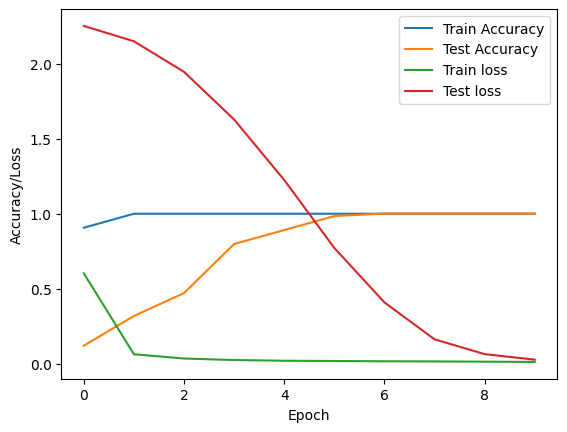

In [68]:
plt.plot(history.history['accuracy'] , label='Train Accuracy')
plt.plot(history.history['val_accuracy'] , label='Test Accuracy')

plt.plot(history.history['loss'] , label='Train loss')
plt.plot(history.history['val_loss'] , label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

### Saving Model

In [70]:
model.save('model.h5')